## 2022-5-5

### 1.分位数计算：

In [1]:
import numpy as np
import pandas as pd
  
# 1D array 
arr = [20, 2, 7, 1, 34,5,24,18,50,68,3,78,105,142,320,298,398,245,321,256]

quantiles = np.arange(0.1, 0.99 + 1e-6, 0.1)  # 分位数范围

arr_n = np.quantile(arr,q=quantiles)

print("arr_n : ", arr_n) 
# print("Q2 quantile of arr : ", arr.quant.quantile(arr, .50))
# print("Q1 quantile of arr : ", np.quantile(arr, .25))
# print("Q3 quantile of arr : ", np.quantile(arr, .75))
# print("100th quantile of arr : ", np.quantile(arr, .1)) 

arr_n :  [  2.9   6.6  19.4  30.   59.   88.8 172.9 264.4 320.1]


## 2022-5-7

### 1.数组拼接

In [2]:
import numpy as np


a = np.array([[1,1,1],[2,2,2]])
b = 2 * np.array([[1,1,1],[2,2,2]])
c = np.array([[3,3,3]])

print(a)
print(b)
print(c)

k = np.append(a,b,axis=0) # 按行数组拼接
m = np.append(a,c,axis=0)

d = c.reshape(1,-1)  # 一个类别的单个样本
h = np.append(a,d,axis=0)

n = np.average(k, axis=0) # 按列求均值

print("k is:",k)
print("m is:",m)
print("n is:",n)
print("h is:",h)

[[1 1 1]
 [2 2 2]]
[[2 2 2]
 [4 4 4]]
[[3 3 3]]
k is: [[1 1 1]
 [2 2 2]
 [2 2 2]
 [4 4 4]]
m is: [[1 1 1]
 [2 2 2]
 [3 3 3]]
n is: [2.25 2.25 2.25]
h is: [[1 1 1]
 [2 2 2]
 [3 3 3]]


### 2. 多宽度模拟切丝

In [5]:
cut_width_list = []
for k in range(19,30):
    cut_width_list.append( round(k / 24, 3))
cut_width_list

[0.792, 0.833, 0.875, 0.917, 0.958, 1.0, 1.042, 1.083, 1.125, 1.167, 1.208]

### 3.模型超参优化

#### 3.1. xgboost

In [ ]:
from xgboost import XGBClassifier


mdl = XGBClassifier(objective='binary:logistic',
                    silent=True, nthread=1)

    # RandomizedSearchCV
    search_spaces = dict(
        learning_rate=[0.1, 0.01, 0.05],
        n_estimators=range(200, 700, 100),
        min_child_weight=[1, 5, 10],
        gamma=[0.5, 1, 1.5, 2, 5],
        subsample=[0.6, 0.8, 1.0],
        colsample_bytree=[0.6, 0.8, 1.0],
        max_depth=range(2, 10, 1),
    )

    searchcv = RandomizedSearchCV(
        mdl,
        param_distributions=search_spaces,
        cv=mdl_cv_kf,
        scoring=mdl_scoring_acc,
        verbose=0,
        refit=False,
        n_jobs=-1,
        n_iter=20,
    )

## 2022.05.08

### 1.图标签替换

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'Testing'

ax.set_xticklabels(labels)

plt.show()

实际项目表现：

In [ ]:
fig, ax = plt.subplots()
fig.canvas.draw()
target_counts.plot(kind='bar', title='Count (target)')
code_labels = [item.get_text() for item in ax.get_xticklabels()]
text_labels = [sim_level_map[int(item)] for item in code_labels]
ax.set_xticklabels(text_labels, rotation = 30)
plt.show()

### 2. range测试

In [4]:
a = range(1, 3)
print(a)
print(list(a))

range(1, 3)
[1, 2]


可以看到，range返回一个list。

In [1]:
a = range(5)
print(list(a))

[0, 1, 2, 3, 4]


若不设定起始值，则range范围默认起始值为0.

## 2022.05.09

### 1.Series循环

In [2]:
import pandas as pd


s = pd.Series(['A', 'B', 'C'])
for index, value in s.items():
    print(f"Index : {index}, Value : {value}")

Index : 0, Value : A
Index : 1, Value : B
Index : 2, Value : C


## 2022.05.12

### 1. ExtraTree Feature Imporrtance

In [ ]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(10), indices)
plt.xlim([-1, 10])
plt.show

## 2022.05.17

### 1. The network graph to visualization correlation

In [3]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import networkx as nx
from ipywidgets import Layout, widgets
import math
import matplotlib.dates as md
import yfinance as yf


payload = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')


# S&P500 metadata
sp500_table = payload[0]

# mappings 
sp500_tickers = sp500_table.Symbol.str.upper().values
sp500_names = sp500_table.Security.values
sp500_sectors = sp500_table["GICS Sector"].values
sp500_sub_sectors = sp500_table["GICS Sub-Industry"].values
sp500_names_mapping = dict(zip(sp500_tickers, sp500_names))
sp500_sector_mapping = dict(zip(sp500_names, sp500_sectors))
sp500_sub_sector_mapping = dict(zip(sp500_names, sp500_sub_sectors))
sector_color_mapping = dict(zip(sp500_sectors, sns.color_palette("pastel", len(sp500_sectors)).as_hex()))
subsector_color_mapping = dict(zip(sp500_sub_sectors, sns.color_palette("pastel", len(sp500_sub_sectors)).as_hex()))

# download S&P500 financial data
tickers = list(sp500_tickers)
prices = yf.download(tickers, start="2020-01-01", end="2021-12-31", interval='1d')
prices = prices["Adj Close"]
prices = prices.rename(columns=sp500_names_mapping)
prices

# impute
for i, row in prices.iterrows():
  if row.isnull().mean() > 0.9: prices.drop(i, inplace=True)
prices = prices.loc[:, prices.isnull().mean() < 0.3]
prices = prices.fillna(method='bfill')
print(prices.shape)

# calculate rolling correlation
corr = prices.rolling(60).corr()
corr_ = np.array([corr.loc[i].to_numpy() for i in prices.index if not np.isnan(corr.loc[i].to_numpy()).all()])
corr_ = np.nansum(corr_, axis=0)/len(corr_)
corr_ = pd.DataFrame(columns=prices.columns.tolist(), index=prices.columns.tolist(), data=corr_)

URLError: <urlopen error [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。>

In [ ]:
threshold_choice = widgets.FloatSlider(description="Threshold", value=0.8, min=0.5, max=1, step=0.05, continuous_update=False, 
                                       orientation='horizontal', layout=Layout(width='500px'), style=dict(description_width= 'initial'))
network = go.FigureWidget(data=[go.Scatter(x=[], y=[], mode='lines', text=[],  line=dict(color='MediumPurple', width=10), marker=dict(size=20, line_width=10,line=dict(color='MediumPurple',width=2))),
                                 go.Scatter(x=[], y=[],mode='markers+text', textposition="top center", text=[],hoverinfo='text',textfont_size=12, marker=dict(size=50, color=[],line_width=1))],
                          layout=go.Layout( showlegend=False, annotations=[], margin=dict(t=40, b=0, l=0, r=0), width=1600, height=800))
df = prices.copy()
correlation_matrix = corr_.to_numpy()

def plot_corr_graph(change):
    threshold, corr_mode = None, None
    threshold = change.new
    
    tr_ind = np.triu_indices(correlation_matrix.shape[0])
    correlation_matrix[tr_ind] = 0
    G = nx.from_numpy_matrix(correlation_matrix)
    G = nx.relabel_nodes(G, lambda x: df.columns.tolist()[x])
    # 49 x 49 - 49 (self corr) / 2 (remove upper triang)
    remove = []
    
    for col1, col2, weight in G.edges(data=True):
      if math.isnan(weight["weight"]):
        remove.append((col1,col2))
    
      if abs(weight["weight"]) < threshold:
        remove.append((col1,col2))
    
    G.remove_edges_from(remove)
    
    remove = []
    edges = list(sum(G.edges, ()))
    
    for node in G.nodes:
      if node not in edges:
        remove.append(node)
    G.remove_nodes_from(remove)
    mst = nx.maximum_spanning_tree(G)
    
    def assign_color(col):
      return sector_color_mapping[sp500_sector_mapping[col]]
    def assign_color_edge(correlation):
      if correlation < 0:
        return "#BF0603"
      else:
        return "#00CC66"
    edge_colors = []
    node_colors = []
    for key, value in nx.get_edge_attributes(mst, 'weight').items():
        edge_colors.append(assign_color_edge(value))
    for key, value in dict(mst.degree).items():
        node_colors.append(assign_color(key))
      
    labels = {n:n for n in mst.nodes()}
    node_x = []
    node_y = []
    
    tree = nx.fruchterman_reingold_layout(mst, k=0.25).items()
    
    for node, (x_,y_) in tree:
        node_x.append(x_)
        node_y.append(y_)
        
    def get_dim_of_node(name):
        for node, (x,y) in tree:
            if node == name:
                return x,y
        
    edge_x = []
    edge_y = []
    
    weights= []
    for node1, node2, w in mst.edges(data=True):
        x0, y0 = get_dim_of_node(node1)
        x1, y1 =  get_dim_of_node(node2)
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)
        weights.append((round(w["weight"],1), (x0+x1)/2, (y0+y1)/2))
                              
    with network.batch_update():
        network.data[1].x = node_x
        network.data[1].y = node_y
        network.data[1].text = list(labels)
        network.data[1].marker.color = node_colors
                          
        network.data[0].x = edge_x
        network.data[0].y = edge_y
        network.data[0].text = list(weights)
        network.update_layout(xaxis_zeroline=False, yaxis_zeroline=False, xaxis_showgrid=False, yaxis_showgrid=False, plot_bgcolor='rgba(0,0,0,0)')

threshold_choice.observe(plot_corr_graph, names="value")
widgets.VBox([threshold_choice, network])

## 2022.5.18

### 1.缺失值可视化

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(df_X.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

可视化每一个特征缺失值的比例

In [ ]:
df_X.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

### 2.seaborn多个子图（subplot）

Text(0.5, 0.98, 'A single ax with no data')

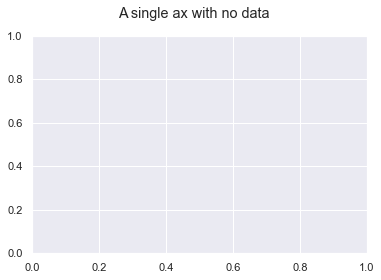

In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()


fig, ax = plt.subplots()
fig.suptitle('A single ax with no data')

多个子图：

Text(0.5, 0.98, '1 row x 2 columns axes with no data')

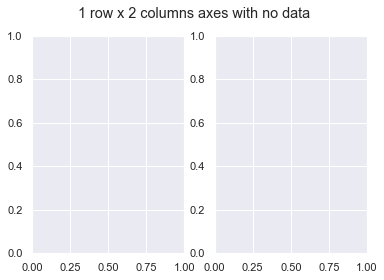

In [5]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('1 row x 2 columns axes with no data')

更多子图：

Text(0.5, 0.98, '3 rows x 4 columns axes with no data')

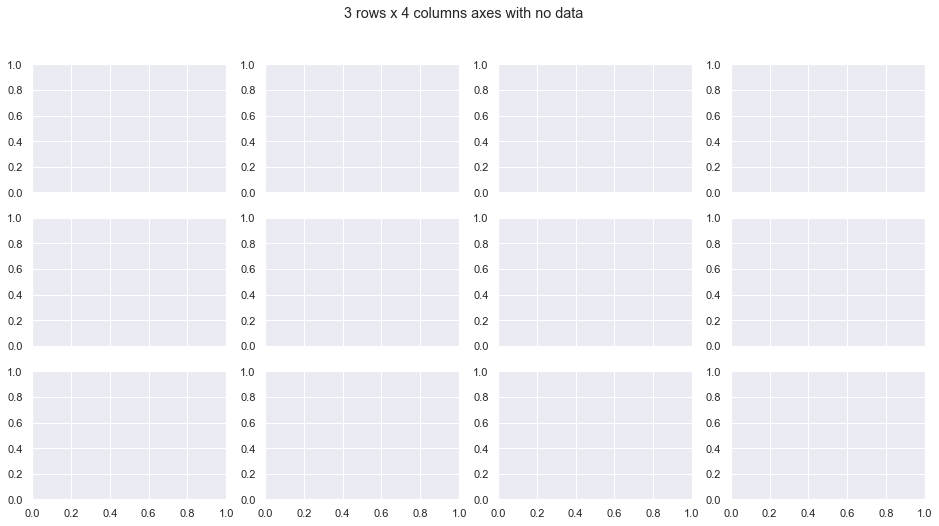

In [6]:
fig, axes = plt.subplots(3, 4, sharex=True, figsize=(16,8))
fig.suptitle('3 rows x 4 columns axes with no data')

加入数据示例：

In [ ]:
pokemon_filepath = '../datasets/pokemon.csv'
pokemon = pd.read_csv(pokemon_filepath)
pokemon.head()

poke_num = pokemon[['Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].set_index('Name')

bulbasaur = poke_num.loc['Bulbasaur']
charmander = poke_num.loc['Charmander']
squirtle = poke_num.loc['Squirtle']


fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Pokemon Stats by Generation')

sns.boxplot(ax=axes[0, 0], data=pokemon, x='Generation', y='Attack')
sns.boxplot(ax=axes[0, 1], data=pokemon, x='Generation', y='Defense')
sns.boxplot(ax=axes[0, 2], data=pokemon, x='Generation', y='Speed')
sns.boxplot(ax=axes[1, 0], data=pokemon, x='Generation', y='Sp. Atk')
sns.boxplot(ax=axes[1, 1], data=pokemon, x='Generation', y='Sp. Def')
sns.boxplot(ax=axes[1, 2], data=pokemon, x='Generation', y='HP')

给subplot加标题：

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.title.set_text('First Plot')
ax2.title.set_text('Second Plot')
ax3.title.set_text('Third Plot')
ax4.title.set_text('Fourth Plot')
plt.show()

### 3.Feature Selection

Fast Correlation-Based Filter (FCBF) selection
http://www.public.asu.edu/~huanliu/papers/icml03.pdf

https://github.com/shiralkarprashant/FCBF
https://github.com/onlinex/FCBF
https://github.com/Doctorado-ML/mufs
https://github.com/SantiagoEG/FCBF_module

### 4.数组拼接

In [2]:
import numpy as np

idx = np.concatenate([np.arange(1,12), np.arange(19,20)])
idx

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 19])

## 2022.5.19

### 1.设置随机种子，保证重复性

In [14]:
import random

random_state = 42
random.seed(random_state)
noise = [random.random() for i in range(1,10)]
noise

[0.6394267984578837,
 0.025010755222666936,
 0.27502931836911926,
 0.22321073814882275,
 0.7364712141640124,
 0.6766994874229113,
 0.8921795677048454,
 0.08693883262941615,
 0.4219218196852704]

### 2.NIR光谱波长点选择

* A variable selection method based on uninformative variable elimination for
multivariate calibration of near-infrared spectra
https://www.libpls.net/publication/MCUVE_2008.pdf
* https://github.com/JinZhangLab/CalibrationLibrary

### 3.NIR光谱预处理

* [Review of the most common pre-processing techniques for near-infrared spectra](http://www.models.life.ku.dk/sites/default/files/preproNIR.pdf)

## 2022.05.21

### 1. Feature Selection

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

### 2. Feature Selection With Boruta Shap

In [ ]:
from BorutaShap import BorutaShap

# Creates a BorutaShap selector for regression
# True for classification; False for Regression
selector = BorutaShap(importance_measure = 'shap', classification = True)

# Fits the selector
X_train = df_train[names_stats]
y_train = df_train[target]
selector.fit(X = X_train, y = y_train, n_trials = 100, sample = False, verbose = True)

# Display features to be removed
features_to_remove = selector.features_to_remove
print(features_to_remove)

## 2022.05.22

### 1.Classification with correlated features

[Classification with correlated features: unreliability of feature
ranking and solutions](https://watermark.silverchair.com/btr300.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAt0wggLZBgkqhkiG9w0BBwagggLKMIICxgIBADCCAr8GCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMWTrongKExeaxgkybAgEQgIICkE8lJeGu_NA2wdEqTUf1i47fVzmUSjm_OII4-BnGcKSxHOm6S7dEd1lUDatB-TR_JWnrQmp7c16aPNpByWwpCGWhCQ274EMuF2R_FjmA-dFmuPxShvlskHj4fGQMsIquur7UYT-sLwf5wGKIsXlU1Aro8wBltUzglTMswJw3w0y1AQjvkNo_-bL_lE51QXBxDmlNQbeR89EZuDrFf_8W51ww8unnDYLk4oS4TrEtnGCH0Z_MJFthtyJ3-IFhICbWsCSXQiwADbRX-tb0LOM-6aQFYA6E4lyOonJDPcsQYL53BOv1GyIkW1cU_uqSxKGrpIdCf4SWBBB8GJFP93wYG6_L_oap1qvNmRoQ0wiDWv-3Jb_j1w7m23dbQ46fssciAA5kW69E_IFi9co0QiRuox2rYooozKoRKf3T8SEZMvChWZA9DfcnGa-pfv9MpEXCi8tlgeGOEb6tc6yLTh0Uehi_bFh58GKxS0TwWHYF2I5AkP80vURBiYG1szeBwsh3Q_e-38VsPvaMhCTWpYYSzbPAzExCOyje7hCegnRkJzT7NZwxZQXSUimsD3i0dy8Hx9ADnaFCNfXRmvOeFbz1BXlSzfueYHLjWlCwJQRfruxjNjRe2t35kB1N0gd2vK0o6daVOdfYPh5PXw8cdYOoVn7nRHJ9RnYk0wHNH4e7GSxSgmq-XYarQzd1xxhCzzLsS0RVElJL1S3Zu5HUMjoNqiZllGbWjtRfWUnR7w_K5OL-HzIi9hP563P3l6Xyp2P5xblroPYVoZIrp-mP2VCvMHVMEwjNcQsgEYpyStadnPsq4pD2iMGv8ANTWi9GhidUaVEYkIW8qd3xFLl5z35UFfnwTE4nFGoyO1AO-K57KA80)

In this article,
we show that the measures of feature relevance corresponding to
the above-mentioned methods are biased such that the weights of
the features belonging to groups of correlated features decrease
as the sizes of the groups increase, which leads to incorrect model
interpretation and misleading feature ranking.

## 2022.05.23

### 1.dict转Series

In [5]:
import pandas as pd

bb = {
	"one": 'out',
	"two": 'in',
	"three": 1987,
}
print(type(bb))
aa = pd.Series(bb)
print(type(aa))

<class 'dict'>
<class 'pandas.core.series.Series'>


### 2.热力图观察dataframe是否有Null值

In [ ]:
# NULL Analysis
print(dataset.isnull().sum())

sns.heatmap(dataset.isnull(), cbar=True)
plt.title('NULL Values')
plt.tight_layout() # Adjust the padding between and around subplots.

### 3.beat XGBoost with linear model by feature engineering

* https://medium.com/@dave.cote.msc/demonstrating-the-power-of-feature-engineering-part-ii-how-i-beat-xgboost-with-linear-regression-e63aeb6a15f8
* https://github.com/christophM/rulefit
* https://github.com/natekupp/ffx

### 4.wordcloud

* https://github.com/amueller/word_cloud

### 5.crosstab可视化

In [6]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

获取数据：

In [7]:
data = pd.read_csv(r'.\data\banking.csv')
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [8]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


计算'y'中每类的平均值：

In [9]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


计算'job'中每类的平均值：

In [10]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


可视化：

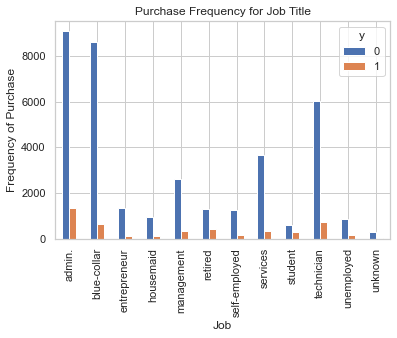

In [11]:

pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.show()

单根竖条，总和为1：

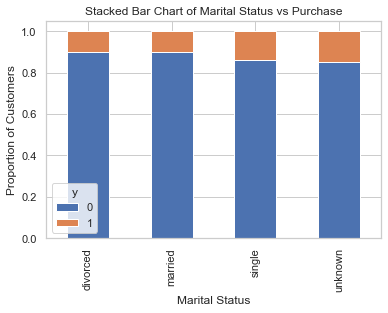

In [12]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

## 2022.5.24

### 1.观察不同类别样本是否均衡

In [13]:
target_counts = df[target].value_counts()

# unique, counts = np.unique(y_train, return_counts=True)
# target_counts = dict(zip(unique, counts))

for key, val in target_counts.items():
    #print(f"Class : {label_decoder[key]}, Count : {val}")
    print(f"Class : {key}, Count : {val}")

fig, ax = plt.subplots()
fig.canvas.draw()
#pd.Series(target_counts).plot(kind='bar', title='Sample Count (each class)')
target_counts.plot(kind='bar', title='Sample Count (each class)')
code_labels = [item.get_text() for item in ax.get_xticklabels()]
#text_labels = [label_decoder[int(float(item))] for item in code_labels]
text_labels = [int(float(item)) for item in code_labels]
ax.set_xticklabels(text_labels, rotation=90)
plt.show()

NameError: name 'df' is not defined

### 2.catplot设置xticklabel

In [ ]:
tmp = df_stats_all.loc[saved_spectrum_names, "stats"].sort_values(ascending=False)

for name in tmp.index:
    plot = sns.catplot(x=target, y=name, data=df_train, kind="box")
    for axes in plot.axes.flat:
        code_labels = [item.get_text() for item in axes.get_xticklabels()]
        text_labels = [label_decoder[int(float(item))] for item in code_labels]
        axes.set_xticklabels(text_labels, rotation=90)
    plt.title(f"stats:{df_stats_all.loc[name, 'stats']:.3f}, pval:{df_stats_all.loc[name, 'pval']:.3f}")
    

### 3.多个模型分类结果可视化

In [ ]:
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions

X = X_test[names_X[indices[:2]]]
y = y_test

# Plotting Decision Regions
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         ['Logistic Regression', 'Random Forest', 'RBF kernel SVM', 'Ensemble'],
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
plt.show()

### 4.载入sklearn iris dataset

In [19]:
from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target

df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 2022.5.25

### 1.多数投票分类器（MajorityVotingClassifier）

In [20]:
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [21]:
class MajorityVotingClassifier(object):
    def __init__(self):
        self.models = list()
        
    def add_model(self, model):
        self.models.append(model)
        
    def fit(self, X, y):
        
        if len(self.models) == 0:
            raise ValueError('Classifier hasn\'t any models "inside"')
        
        for model in self.models:
            model.fit(X, y)
            
    def predict(self, X):
        results = [model.predict([X])[0] for model in self.models]
        
        map = dict()
        
        for result in results:
            if result in map:
                map[result] += 1
            else:
                map[result] = 1        
        
        map = list(map.items())
        map.sort(reverse=True, key= lambda i : i[1])
        return map[0][0]
    
    def score(self, X, y):
        predictions = np.array([self.predict(x) for x in X])
        
        return np.sum(predictions == y) / len(y)
    
    def score_models(self, X, y):
        results = [model.score(X, y) for model in self.models]
        return results

使用示例：

In [22]:
data = load_wine()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [27]:
mjvclf = MajorityVotingClassifier()

lr = LogisticRegression(max_iter=10000)
rf = RandomForestClassifier(n_estimators=100)
mlp = MLPClassifier(activation='tanh', max_iter=10000)
dt = DecisionTreeClassifier(max_depth=3)

mjvclf.add_model(lr)
mjvclf.add_model(rf)
mjvclf.add_model(mlp)
mjvclf.add_model(dt)

mjvclf.fit(X_train, y_train)

In [28]:
print(mjvclf.score(X_test, y_test))
mjvclf.score_models(X_test, y_test)

0.9629629629629629


[0.9629629629629629,
 0.9814814814814815,
 0.8888888888888888,
 0.8518518518518519]

sklearn官方版本：

In [ ]:
>>> import numpy as np
>>> from sklearn.linear_model import LogisticRegression
>>> from sklearn.naive_bayes import GaussianNB
>>> from sklearn.ensemble import RandomForestClassifier, VotingClassifier
>>> clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
>>> clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
>>> clf3 = GaussianNB()
>>> X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
>>> y = np.array([1, 1, 1, 2, 2, 2])
>>> eclf1 = VotingClassifier(estimators=[
...         ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
>>> eclf1 = eclf1.fit(X, y)
>>> print(eclf1.predict(X))
[1 1 1 2 2 2]
>>> np.array_equal(eclf1.named_estimators_.lr.predict(X),
...                eclf1.named_estimators_['lr'].predict(X))
True
>>> eclf2 = VotingClassifier(estimators=[
...         ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
...         voting='soft')
>>> eclf2 = eclf2.fit(X, y)
>>> print(eclf2.predict(X))

## 2022.5.26

### 1.多类别数据可视化

多类别直方图，加入'hue'标签：

In [ ]:
sns.histplot(data=data, x="flipper_length_mm", hue="species")

多类别条形图，加入'hue'标签：

In [ ]:
sns.barplot(x = “species”, y = “flipper_length_mm”, 
            data = data, hue = “sex”)

### 2.聚类分析

#### 读取数据

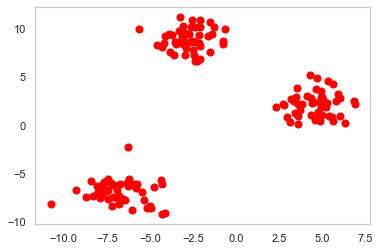

In [38]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

random_state = 42

X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=1.2,
                  shuffle=True,
                  random_state=random_state)

plt.scatter(X[:,0],
            X[:,1],
            c='red',
            marker='o',
            s=50)
plt.grid()
plt.show()

#### 聚类建模

In [40]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=random_state)

y_km = km.fit_predict(X)


#### 结果可视化

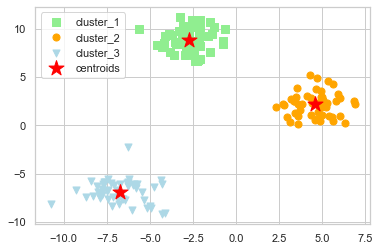

In [42]:
plt.scatter(X[y_km==0, 0],
            X[y_km==0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster_1')

plt.scatter(X[y_km==1, 0],
            X[y_km==1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster_2')
plt.scatter(X[y_km==2, 0],
            X[y_km==2, 1],
            s=50,
            c='lightblue',
            marker='v',
            label='cluster_3')

plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=250,
            c='red',
            marker='*',
            label='centroids')

plt.legend()
plt.grid(True)
plt.show()

#### 结果评价

##### 肘方法
簇内误差平方和：

In [43]:
print(f'Distortion: {km.inertia_:.3f}')

Distortion: 408.385


基于簇内平方和估计最优的簇数量k：

d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


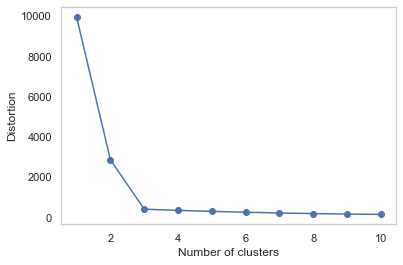

In [44]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=random_state)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.grid()
plt.show()


##### 轮廓分析
通过图形工具度量簇中样本聚集的密集程度，定量分析聚类质量。

In [45]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=random_state)

y_km = km.fit_predict(X)

轮廓分析：

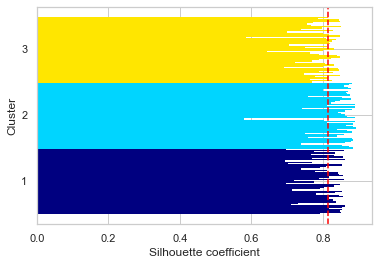

In [49]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km==c]
    y_ax_upper += len(c_silhouette_vals)
    
    color = matplotlib.cm.jet(i / n_clusters)
    
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower+y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg,
            color='red',
            linestyle='--')
plt.yticks(yticks,cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

#### 凝聚层次聚类

In [52]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')

labels = ac.fit_predict(X)
print(f'Cluster labels: {labels}')

Cluster labels: [0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1
 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1
 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0
 0 0]


样本被划分到两个不同的簇。

#### DBSCAN（基于密度的聚类）
基于密度空间的聚类算法（Density-based Spatial Clustering of Applications with Noise，DBSCAN），可以识别并移除噪声点。


创建一个半月形的数据集，分别使用前述三个不同的聚类方法，对其聚类结果进行比较：

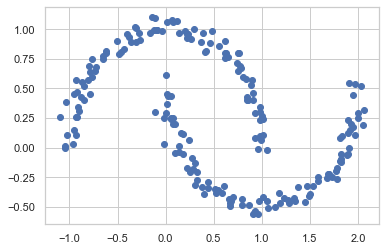

In [53]:
from sklearn.datasets import make_moons

random_state=42
X, y = make_moons(n_samples=200,
                  noise=0.05,
                  random_state=random_state)

plt.scatter(X[:,0],X[:,1])
plt.show()

首先使用KMeans和层次聚类，看聚类效果：

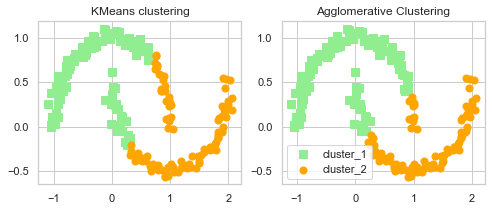

In [54]:
from sklearn.cluster import KMeans

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,3))

km = KMeans(n_clusters=2,
            random_state=random_state)

y_km = km.fit_predict(X)

ax1.scatter(X[y_km==0, 0],
            X[y_km==0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster_1')

ax1.scatter(X[y_km==1, 0],
            X[y_km==1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster_2')
ax1.set_title('KMeans clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')

y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0, 0],
            X[y_ac==0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster_1')

ax2.scatter(X[y_ac==1, 0],
            X[y_ac==1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster_2')
ax2.set_title('Agglomerative Clustering')


plt.legend()
plt.grid(True)
plt.show()

可以看到，以上两种聚类方法都无法将复杂形状数据的两个簇分开。

下面尝试用DBSCAN：

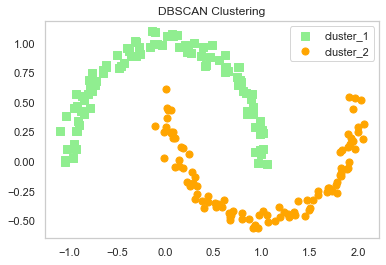

In [57]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')

y_db = db.fit_predict(X)

plt.scatter(X[y_db==0, 0],
            X[y_db==0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster_1')

plt.scatter(X[y_db==1, 0],
            X[y_db==1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster_2')
plt.title('DBSCAN Clustering')
plt.legend()
plt.grid()
plt.show()

DBSCAN可将任意形状的数据进行聚类。

## 2022.05.29

### sns pairplot
https://seaborn.pydata.org/generated/seaborn.pairplot.html


In [11]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset("penguins")
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [12]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


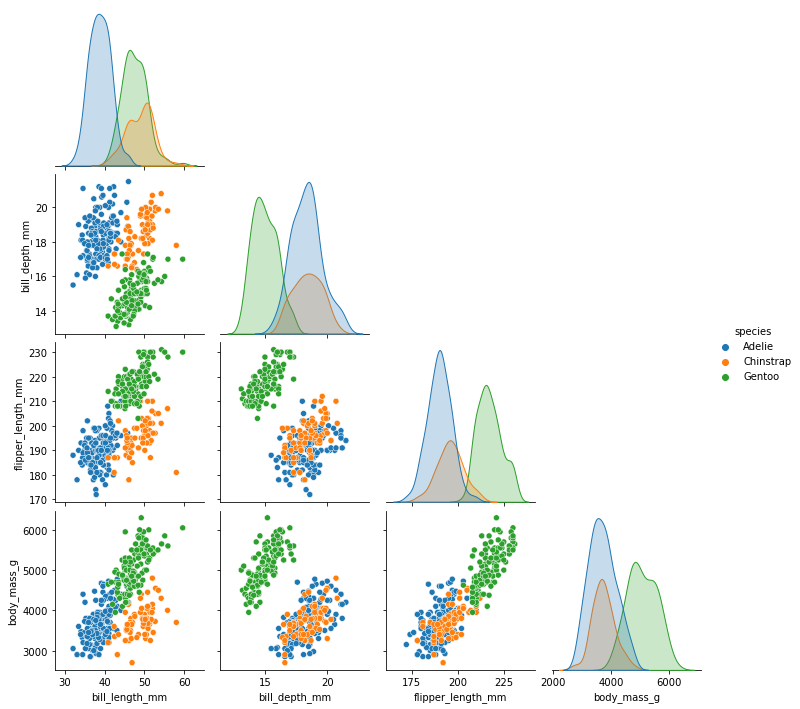

In [10]:
sns.pairplot(df, hue='species', corner=True)
#sns.pairplot(df, hue="species", markers=["o", "s", "D"])


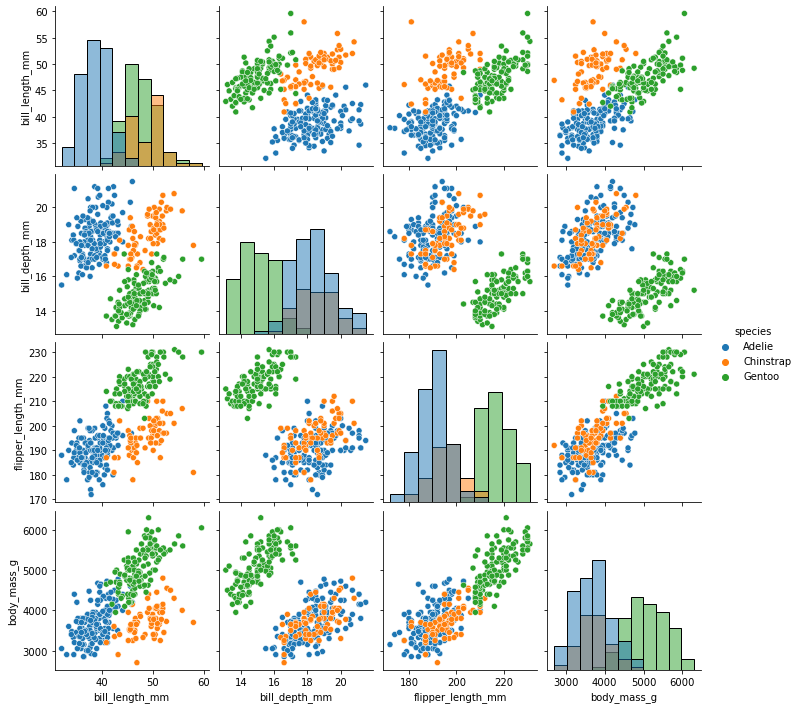

In [13]:
sns.pairplot(df, hue="species", diag_kind="hist")

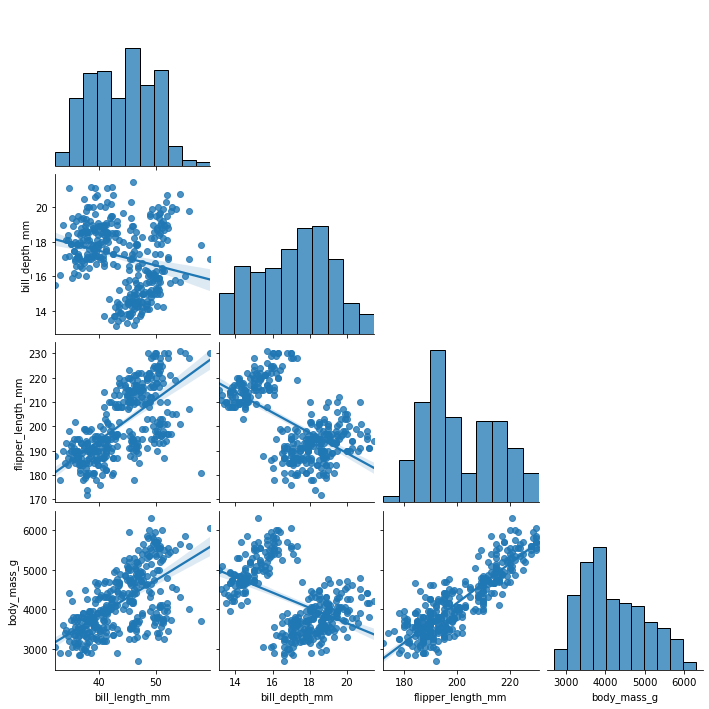

In [21]:
sns.pairplot(df, kind='reg', corner=True)

仅选择部分变量：

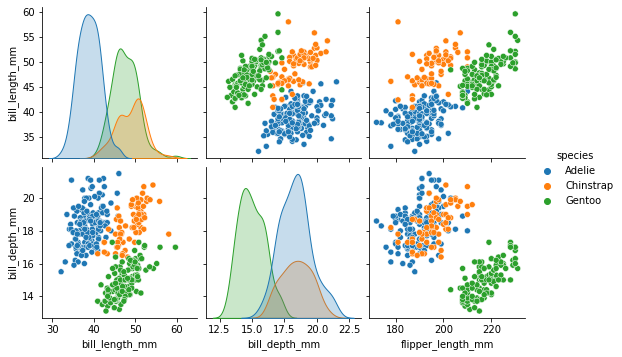

In [22]:
sns.pairplot(
    df,
    x_vars=["bill_length_mm", "bill_depth_mm", "flipper_length_mm"],
    y_vars=["bill_length_mm", "bill_depth_mm"],
    hue='species', 
    
)

## 2022.05.30

### 1.从map中或者指定value对应的key

In [1]:
labels_decoder = {
    1:"四川会东B1F-B云87第一批次",
    2:"四川会东B1F-B红大第一批次",
    3:"四川会东B1F云87-A",
    4:"四川会东B1F红大-A",
    5:"四川会东B2F-A红大第一批次",
    6:"四川会东B2F-B云87散第一批次",
    7:"四川会东B2F-B红大第一批次",
    8:"四川会东B2F云87-A",
    9:"四川会东B2F红大-A",
    10:"四川会东B3F-B红大",
    11:"四川会东B3F云87-A",
    12:"四川会东C1F云87",
    13:"四川会东C1F云87-A",
    14:"四川会东C1F红大",
    15:"四川会东C2F云87-A",
    16:"四川会东C2F红大-A",
    17:"四川会东C3F云87-A",
    18:"四川会东C3F红大-A",
    19:"四川会东红大B3F-A",
    20:"四川会理C1F-B红大第一批次",
    21:"四川会理C1F云87-A",
    22:"四川会理C1F红大",
    23:"四川会理C3F-B红大第一批次",
    24:"四川会理C3F红大-A",
    25:"四川德昌B2F-B红大",
    26:"四川德昌B2F红大-A",
    27:"四川德昌B3F红大-A",
    28:"四川德昌C2F-A红大第一批次",
    29:"四川德昌C2F-B红大第一批次",
    30:"四川德昌C3F-A红大",
    31:"四川德昌C4F-B红大第一批次",
    32:"四川德昌C4F红大-A",
    33:"四川德昌宁南C1F-B云87第一批次",
    34:"四川德昌宁南C1F云87-A",
    35:"四川德昌宁南C2F-B云87第一批次",
    36:"四川德昌宁南C2F云87-A",
    37:"四川德昌普格B2F-A云87",
    38:"四川德昌普格B2F-B云87",
    39:"四川德昌普格C2F-B云87第一批次",
    40:"四川德昌普格C2F云87-A",
    41:"四川德昌普格C3F-A云87",
    42:"四川德昌普格C3F-B云87",
    43:"四川德昌普格C4F-A云87",
    44:"四川德昌盐源B3F云87-A",
    45:"四川德昌盐源C2F-B云87第一批次",
    46:"四川德昌盐源C2F云87-A",
    47:"四川德昌盐源C3F云87-A",
    48:"四川德昌西昌B1F云87-A",
}

In [3]:
type(labels_decoder)

dict

In [2]:
bc2f_batch = ['四川德昌B2F红大-A','四川德昌普格B2F-A云87','四川会东B2F-A红大第一批次',
              '四川会东B2F红大-A','四川会东B2F云87-A','四川德昌C2F-A红大第一批次',
              '四川德昌宁南C2F云87-A','四川德昌普格C2F云87-A','四川德昌盐源C2F云87-A',
              '四川会东C2F红大-A','四川会东C2F云87-A']

bc3f_batch = ['四川德昌B3F红大-A','四川德昌盐源B3F云87-A','四川会东B3F-B红大',
              '四川会东B3F云87-A','四川会东红大B3F-A','四川德昌C3F-A红大',
              '四川德昌普格C3F-A云87','四川会东C3F红大-A','四川会东C3F云87-A',
              '四川德昌盐源C3F云87-A','四川会理C3F红大-A']

bc4f_batch = ['四川德昌C4F红大-A','四川德昌普格C4F-A云87']

labels_encoder =  {v : k for k, v in labels_decoder.items()}
bc2f_batch_num = [labels_encoder[v] for v in bc2f_batch]
bc3f_batch_num = [labels_encoder[v] for v in bc3f_batch]
bc4f_batch_num = [labels_encoder[v] for v in bc4f_batch]

In [8]:
labels_encoder =  {v : k for k, v in labels_decoder.items()}
bc2f_batch_num = [labels_encoder[v] for v in bc2f_batch]
bc3f_batch_num = [labels_encoder[v] for v in bc3f_batch]
bc4f_batch_num = [labels_encoder[v] for v in bc4f_batch]

print(bc2f_batch_num)
print(bc3f_batch_num)
print(bc4f_batch_num)

[26, 37, 5, 9, 8, 28, 36, 40, 46, 16, 15]
[27, 44, 10, 11, 19, 30, 41, 18, 17, 47, 24]
[32, 43]


## 2022.07.04

### 1.StratifiedGroupKFold 分层分组交叉验证

In [2]:
import numpy as np
from sklearn.model_selection import StratifiedGroupKFold


X = np.ones((17, 2))
y = np.array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

groups = np.array([1, 1, 2, 2, 3, 3, 3, 4, 5, 5, 5, 5, 6, 6, 7, 8, 8])

cv = StratifiedGroupKFold(n_splits=3)
for train_idxs, test_idxs in cv.split(X, y, groups):
    print("TRAIN:", groups[train_idxs])
    print("      ", y[train_idxs])
    print(" TEST:", groups[test_idxs])
    print("      ", y[test_idxs])

TRAIN: [1 1 2 2 4 5 5 5 5 8 8]
       [0 0 1 1 1 0 0 0 0 0 0]
 TEST: [3 3 3 6 6 7]
       [1 1 1 0 0 0]
TRAIN: [3 3 3 4 5 5 5 5 6 6 7]
       [1 1 1 1 0 0 0 0 0 0 0]
 TEST: [1 1 2 2 8 8]
       [0 0 1 1 0 0]
TRAIN: [1 1 2 2 3 3 3 6 6 7 8 8]
       [0 0 1 1 1 1 1 0 0 0 0 0]
 TEST: [4 5 5 5 5]
       [1 0 0 0 0]


## 2022.08.03

### numpy本地持久化

In [1]:
import numpy as np


X = np.array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])


存储到本地：

In [ ]:
#np.save('xx', X)

with open('xx.npy', 'wb') as f:
    np.save(f, X)

读取本地数据：

In [2]:
with open('xx.npy', 'rb') as f:
    a = np.load(f)

## 2022.08.16

### 实际与模拟转换关系

[[1.         0.99966587]
 [0.99966587 1.        ]]


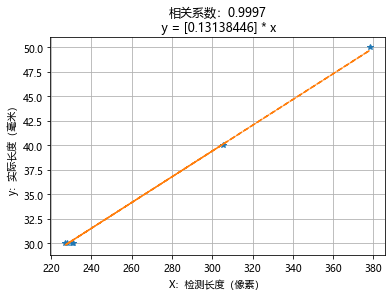

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.rcParams["figure.max_open_warning"] = 100
plt.rcParams["axes.unicode_minus"] = False
plt.rc("font", family="MicroSoft YaHei")

X = np.array([305.278, 227.087, 378.159, 230.403, 230.935, 227.742]).astype(float)
X = X.reshape(-1, 1)
y = np.array([40, 30, 50, 30, 30, 30]).astype(float)
y= y.reshape(-1, 1)

mdl = LinearRegression(fit_intercept=False).fit(
    X, y
)
x = np.linspace(200, 400, 40).reshape(-1, 1)
y_hat = mdl.predict(X)

k = mdl.coef_[0]

df_X = pd.DataFrame(data=X, index=[1,2,3,4,5,6])
df_y = pd.DataFrame(data=y, index=[1,2,3,4,5,6])
corr_res = pd.concat([df_X, df_y], axis=1).corr().to_numpy()
# coef = np.corrcoef(X, y)
# print(k)
print(corr_res)

plt.figure()
plt.plot(X, y, "*")
plt.plot(X, y_hat, "--")
plt.grid()
plt.xlabel("X：检测长度（像素）")
plt.ylabel("y：实际长度（毫米）")
#plt.title(f"拟合方程：\n y = {k} * x")
plt.title(f"相关系数：{corr_res[1, 0]:.4f}\n y = {k} * x")
plt.show()


In [16]:
import numpy as np

xx = np.random.rand(4)
xx

array([0.24188346, 0.06383336, 0.14887211, 0.91692263])

In [1]:
import wget
import os

url = "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/11848/862157/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1662645274&Signature=In%2FEX1dpkUPdhPOoeySpUZP%2FjqocS%2FPKVazyUH%2BKrjdWmqfnYrLJTMmXMyf7%2F3w4RHEctzDWPz5XodgFodBy7IFdIP7eGIc39US0zZcDm47pkgMGyOZ6xEoboQn1JGyktvM0lvit54Rbnm1ijJOhFUmvaK96luGJLNGRgNZz%2FPS5vd0kDZC89bZgmPFPK08zsvMtWDlsy2XY0zoDgKdisXQLDa18TZhwcJiNbAXsGw5%2BmLdOeAjLs%2BQMWnyXhQ%2FvuDgSTXaoJHbJ94K6i0eMTWSjiniG0sqeQJTTFXmqNaNXiBFY4UWK7AN7R7hY8SMEOqK3xieM%2Btn7stL%2BNE9nzA%3D%3D&response-content-disposition=attachment%3B+filename%3Dhistopathologic-cancer-detection.zip"

outfile_name = "histopathologic-cancer-detection.zip"
desdir = "F:\\数据存储\\KaggleDataSet"
des_file = os.path.join(desdir, outfile_name)

wget.download(url, des_file)


'F:\\数据存储\\KaggleDataSet\\histopathologic-cancer-detection.zip'

## 2022.09.16

In [3]:
import numpy as np

B_ary = np.array([0.6042, 0.2421, 0.146, 0.0078])
H_ary = np.array([0.5671, 0.2775, 0.1469, 0.0085])


bh_mix_ins = np.array([0.56, 0.2793, 0.1515, 0.0093])
after_mix = np.array([0.5467, 0.2904, 0.1543, 0.0086])

bh_mix_cal = B_ary * 0.63 + H_ary * 0.27
tmp = bh_mix_ins - bh_mix_cal
print(tmp*10)

[0.26237 0.51852 0.19857 0.02091]


## 2022.09.18

### 1.骨架提取

In [15]:
from skimage.exposure import rescale_intensity
import numpy as np
import cv2
import matplotlib.pyplot as plt

import mahotas as mt

def cv_imread(file_path,color_patten=cv2.IMREAD_COLOR):
    """
    读取中文路径图片
    :ctime: 2022.06.20
    :param file_path:图片目录
    :param color_patten: 图片模式
    :return: 对应模式下的图片矩阵
    """
    cv_img = cv2.imdecode(np.fromfile(file_path,dtype=np.uint8),color_patten)
    return cv_img


def plt_imshow(image, figszie=(15,7)):
    plt.figure(figsize=figszie)
    if len(image.shape) == 3: # 彩色图，三维数据
        plt.imshow(image)
    elif len(image.shape) == 2: # 灰度图，一维数据
        plt.imshow(image,cmap='gray')
    else:
        assert('wrong image dims!')
        return

def bwmorphClean(image):
    (iH, iW) = image.shape[:2]
    pad = 1
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")

    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]

            if roi[0,0] == roi[1,0] == roi [2,0] == roi [0,1] == roi [0,2] == roi [1,2] == roi [2,1] == roi [2,2] == 0:
                output[y - pad, x - pad] = 0
            else:
                output[y - pad, x - pad] = roi[1,1]

    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")

    return output

def main():
    img_path = r'F:/数据存储/上烟卷接制丝/烟丝综合测试台图像采集/烟丝检测图像_220118/001.bmp'

    img_grey = cv2.cvtColor(cv_imread(img_path), cv2.COLOR_RGB2GRAY)
    img_bin = cv2.inRange(img_grey, 5, 180)

    totalLabels, label_ids, values, centroid = cv2.connectedComponentsWithStats(img_bin, 4, cv2.CV_32S)
    
    for ii in range(0, totalLabels):
        img_out = np.zeros(img_bin.shape, dtype="uint8")
        componentMask = (label_ids == ii).astype("uint8") * 255
        img_out = cv2.bitwise_or(img_out, componentMask)

        #img_res = bwmorphClean(img_out)
        img_res = mt.thin(img_out)
        plt_imshow(img_res)


if __name__ == '__main__':
    main()

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf

Could not import submodules (exact error was: numpy.core.multiarray failed to import).

There are many reasons for this error the most common one is that you have
either not built the packages or have built (using `python setup.py build`) or
installed them (using `python setup.py install`) and then proceeded to test
mahotas **without changing the current directory**.

Try installing and then changing to another directory before importing mahotas.


AttributeError: module 'mahotas' has no attribute 'thin'

## 2022.09.19

### 1. np.where

numpy.where的几种用法：

1、numpy广播机制，根据条件对数组进行相应赋值：

In [1]:
import numpy as np


a = np.arange(9).reshape((3, 3))
print(a)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [2]:
print(np.where(a < 4, -1, 100))

[[ -1  -1  -1]
 [ -1 100 100]
 [100 100 100]]


根据条件`a < 4`则将数组对应元素替换为-1， 否则替换为100。

2、numpy广播机制，根据多个条件对数组进行相应赋值：

In [3]:
print(np.where((a > 2) & (a < 6), -1, 100))

[[100 100 100]
 [ -1  -1  -1]
 [100 100 100]]


3、替换数组满足相应条件的元素

In [4]:
print(np.where(a < 4, -1, a))

[[-1 -1 -1]
 [-1  4  5]
 [ 6  7  8]]


In [5]:
print(np.where(a < 4, a, 100))

[[  0   1   2]
 [  3 100 100]
 [100 100 100]]


注意：np.where()返回新的数组，原始数组不发生改变。

而要改变原始数组，则用法为：

In [6]:
a[a < 4] = -1
print(a)

[[-1 -1 -1]
 [-1  4  5]
 [ 6  7  8]]


4、控制满足条件的元素

In [7]:
print(np.where(a < 4, a * 10, a))

[[-10 -10 -10]
 [-10   4   5]
 [  6   7   8]]


原始数组满足条件的赋值为x(a*10)，否则赋值为y(a)。

## 2022.09.20

### 1.多个元素类型定义

In [3]:
gg = 1.89
rr = 2.08

cc = (gg, rr)
print(cc[0])

1.89
